In [1]:
# https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices
# https://towardsdatascience.com/the-sensitivity-analysis-a-powerful-yet-underused-tool-for-data-scientists-e553fa695976

In [38]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv('./diamonds.csv')
df.color

0        E
1        E
2        E
3        I
4        J
        ..
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53940, dtype: object

In [40]:
df = pd.read_csv('./Diamonds_Prices2022.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.describe()
print(df.columns)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


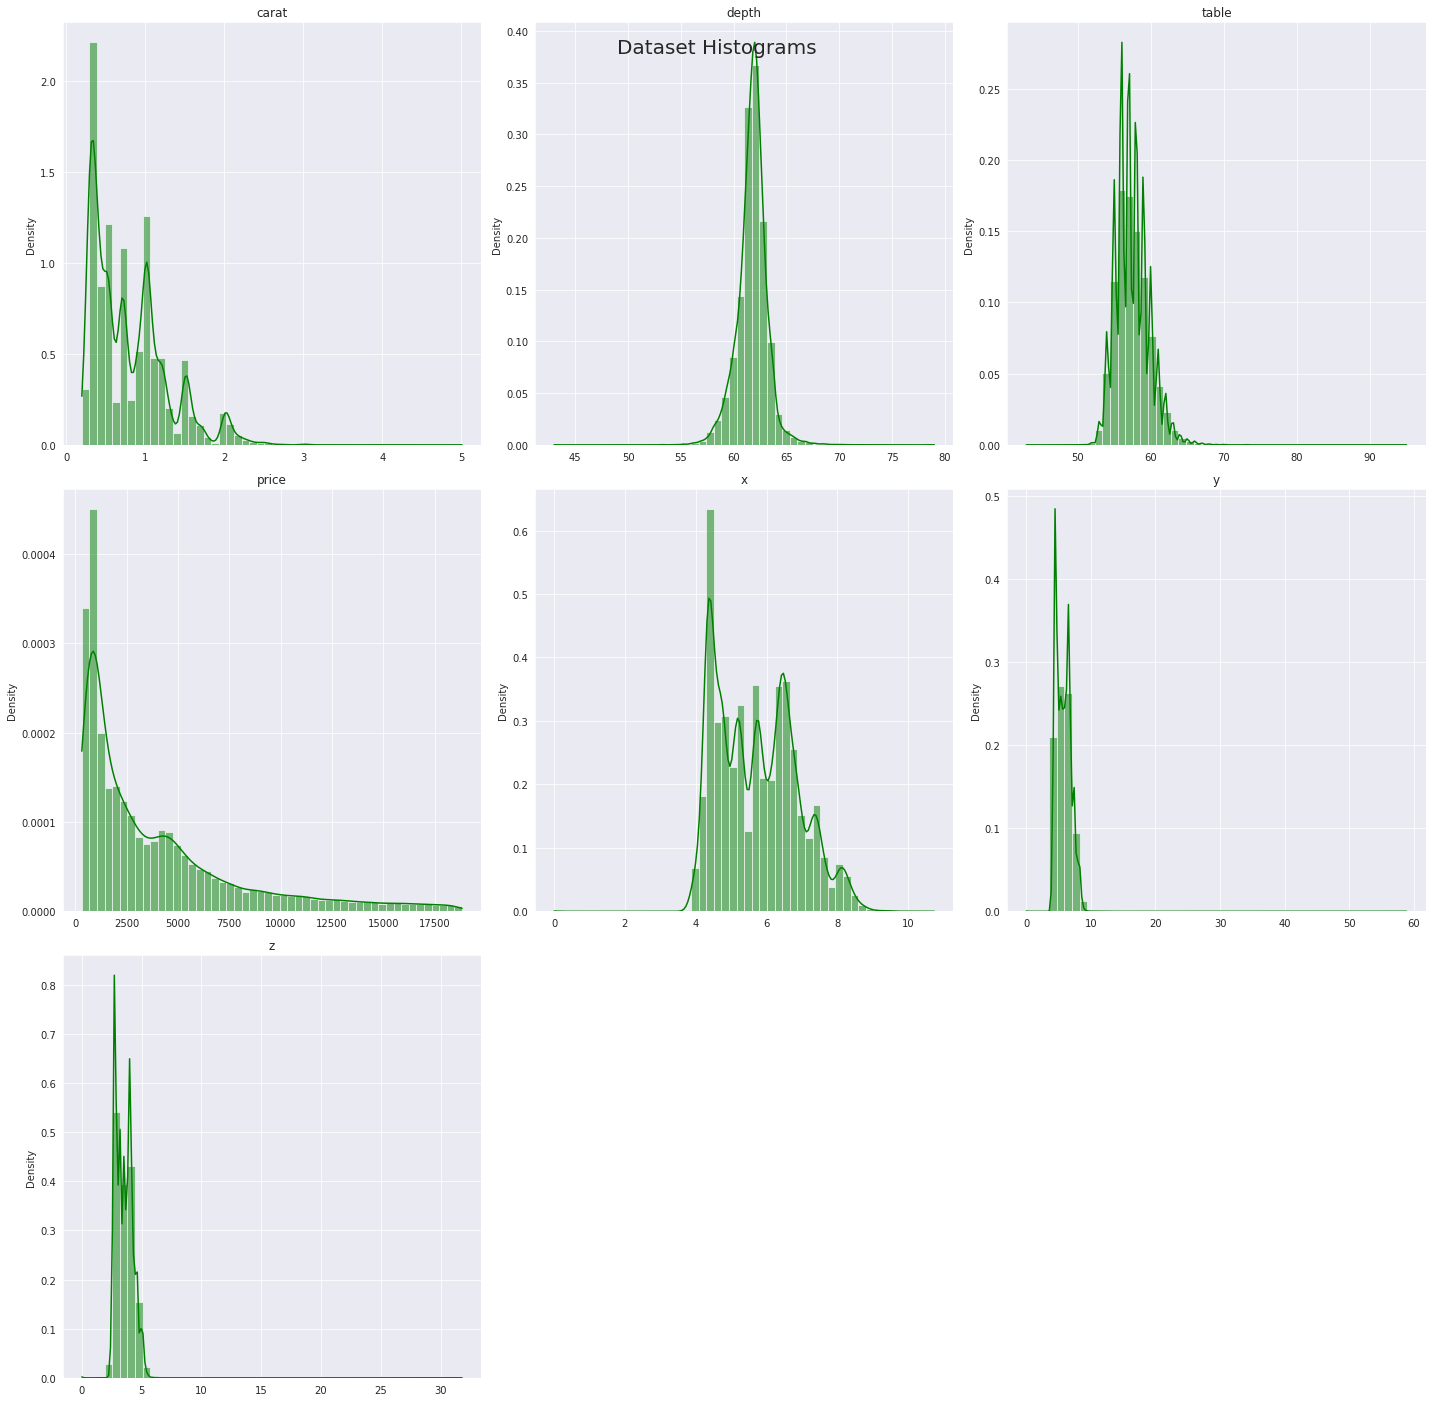

In [112]:
import seaborn as sns

#### Data Exploratory Analysis
features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
sns.set_style("darkgrid")
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Dataset Histograms", fontsize=20, y=0.95)

for n, f in enumerate(features):
    ax = plt.subplot(3,3 , n + 1)

    sns.histplot(df[f],   color='green', bins=50, ax=ax, kde=True, stat='density')

    # chart formatting
    ax.set_title(f)
    ax.set_xlabel("")
plt.tight_layout()

plt.show()

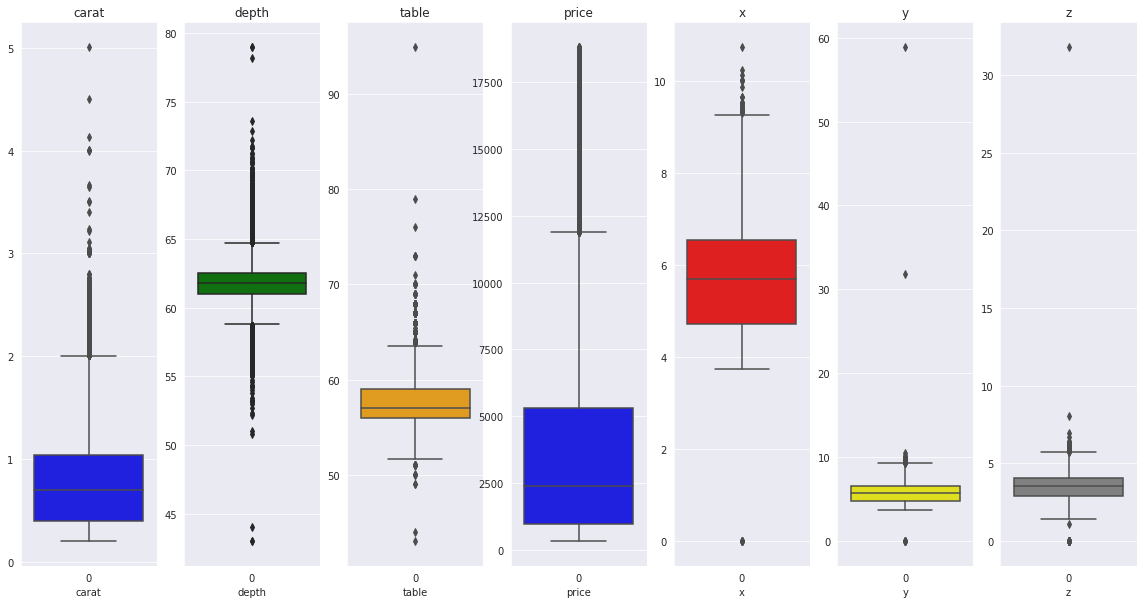

In [125]:
# Boxplot
features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
palette = ['blue', 'g', 'orange', 'b', 'r', 'yellow', 'grey']
pal = sns.color_palette("GnBu", len(features))
plt.figure(figsize=(20, 10))
max_width = 1.0

for n, f in enumerate(features):
   ax = plt.subplot(1,7 , n + 1)
   sns.boxplot(data=df1[f],ax=ax, color=palette[n]).set(title=f, xlabel=f)
plt.show()

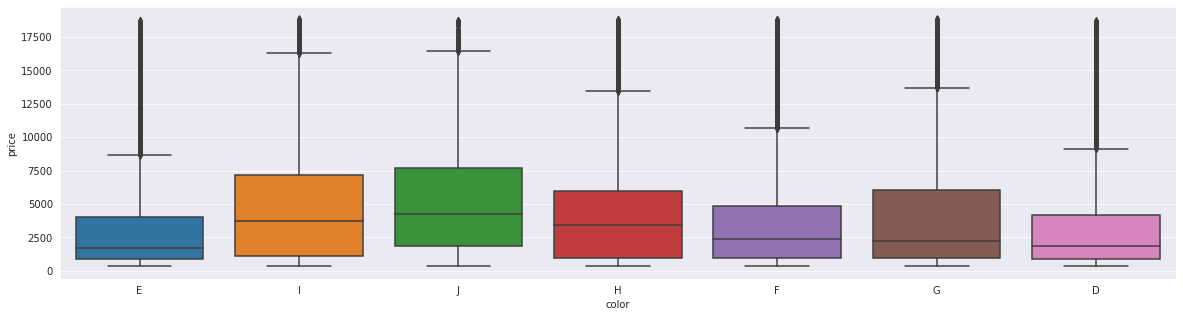

In [129]:
plt.figure(figsize=(20, 5))

sns.boxplot( x=df["color"], y=df["price"] );

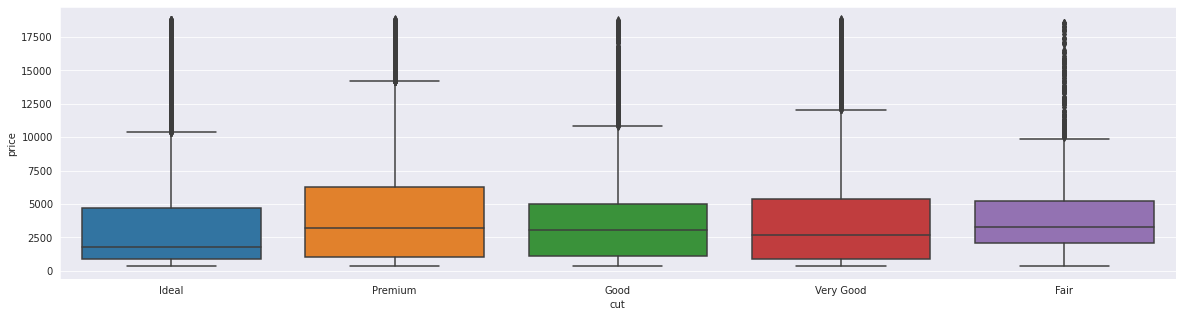

In [130]:
plt.figure(figsize=(20, 5))
sns.boxplot( x=df["cut"], y=df["price"] );

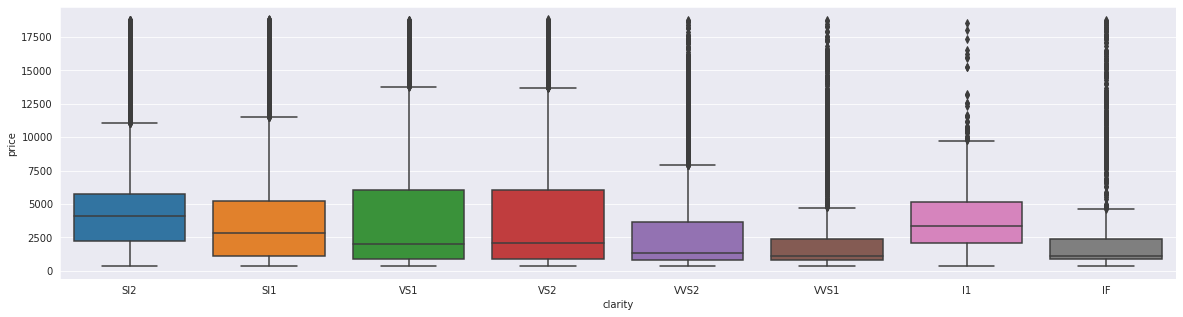

In [131]:
plt.figure(figsize=(20, 5))

sns.boxplot( x=df["clarity"], y=df["price"] );

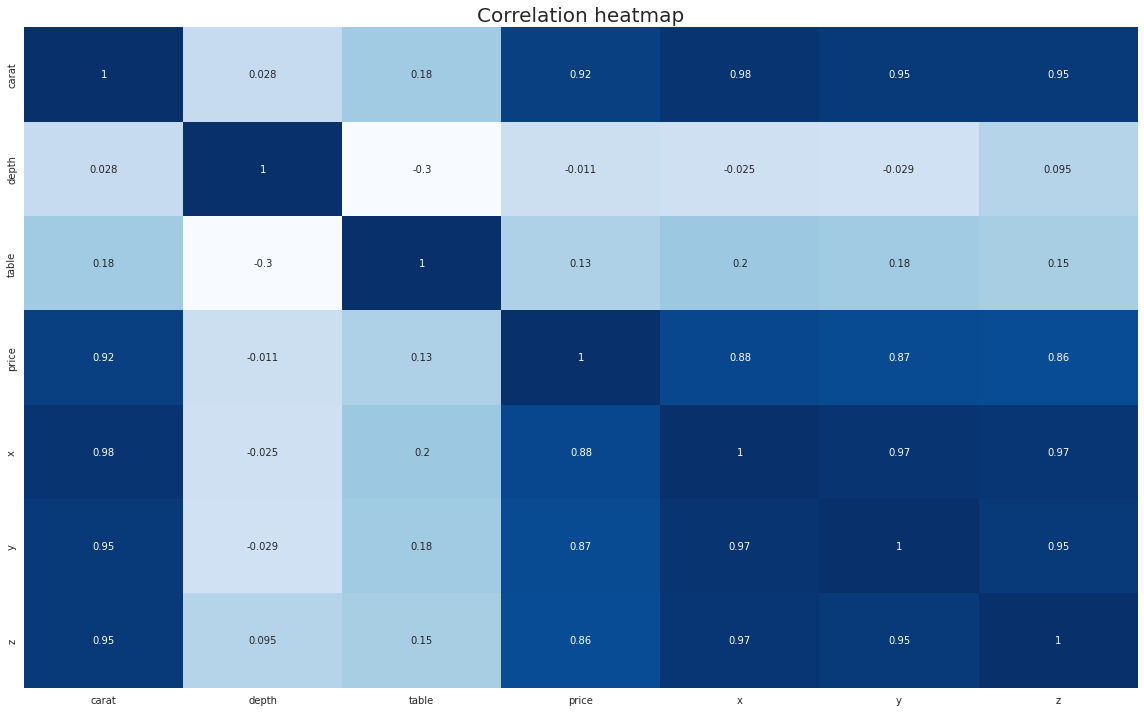

In [143]:
# create heatmap for the calculated correlation
plt.rcParams["figure.autolayout"] = True
df1 = df[features].copy()
plt.figure(figsize=(16,10))
sns.heatmap(df1[np.array(df1.columns)].corr(),annot=True, cmap='Blues', cbar=False)
plt.title('Correlation heatmap', fontsize=20)
plt.show()

In [133]:
df[f]

0        2.43
1        2.31
2        2.31
3        2.63
4        2.75
         ... 
53935    3.50
53936    3.61
53937    3.56
53938    3.74
53939    3.64
Name: z, Length: 53940, dtype: float64